# NLP - Simple Shakespearean Language Model

In this notebook we will create a simple Shakespearean language model using Tensorflow. We will then generate our own Shakespearean poem using the seed text 'Roelof thinks about food'. This notebook is based on the 'DeepLearning.AI TensorFlow Developer Professional Certificate' specialization on Coursera.

This notebook will have the following structure:
1. Load & explore the data
2. Preprocess the data
3. Define & compile the model
4. Train the model
5. Evaluate the model

## 1. Load and explore the data

Import libraries

In [1]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np

### Load the data
Download the data and create the corpus of text. We split on '\n'.

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt
data = open('/tmp/sonnets.txt').read()

corpus = data.lower().split("\n")

--2021-09-14 10:39:42--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.191.128, 173.194.74.128, 209.85.147.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.191.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.002s  

2021-09-14 10:39:42 (55.2 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [7]:
print('the first sentence:', corpus[0] )
print('we have in total', len(corpus), 'sentences.')

the first sentence: from fairest creatures we desire increase,
we have in total 2159 sentences.


## 2. Preprocess the data

We will tokenize each sentence. Then we will cut each sentence so we can predict the next word from the previous word.

For example, 'hello I am Roelof', will then become a (tokenized) sentence 'hello' and we will predict the next word (label) 'I', a sentence 'hello I' and we want to predict 'am', and 'hello I am' with label 'Roelof'.  

In [10]:

# create the tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1  # we use all the words in the text as our vocab length

# create input sequences using list of tokens
input_sequences = []   
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]  # every line in the text to a tokenized sequence (list of tokens)
	for i in range(1, len(token_list)):  # then we cut up each tokenized sentenced into pieces so we can learn the next word in each sentence
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, label = input_sequences[:,:-1],input_sequences[:,-1]

ys = ku.to_categorical(label, num_classes=total_words) 

In [ ]:
print(corpus[0])

from fairest creatures we desire increase,


In [ ]:
print(tokenizer.word_index['from'])
print(tokenizer.word_index['fairest'])
print(tokenizer.word_index['creatures'])
print(tokenizer.word_index['we'])
print(tokenizer.word_index['desire'])

34
417
877
166
213


In [ ]:
print(xs[0])
print(xs[1])
print(xs[2])

[ 0  0  0  0  0  0  0  0  0 34]
[  0   0   0   0   0   0   0   0  34 417]
[  0   0   0   0   0   0   0  34 417 877]


In [ ]:
print(label[1])

877


In [ ]:
print(ys[1])

[0. 0. 0. ... 0. 0. 0.]


In [ ]:
print(xs[5])
print(ys[5])

[0 0 0 0 0 0 0 0 0 8]
[0. 0. 0. ... 0. 0. 0.]


In [13]:
#print(tokenizer.word_index)

 ## 3. Define & compile the model
 We use the maximum sequence length - 1 (the label we predict) as our input length, and the amount of words in our corpus as vocab size. That is why the only hyper parameter is the embedding dimension.

In [11]:
# Hyperparameters
embedding_dim = 100

In [12]:
model = Sequential()
model.add(Embedding(total_words, embedding_dim, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 100)           321100    
_________________________________________________________________
bidirectional (Bidirectional (None, 10, 300)           301200    
_________________________________________________________________
dropout (Dropout)            (None, 10, 300)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 1605)              162105    
_________________________________________________________________
dense_1 (Dense)              (None, 3211)              5156866   
Total params: 6,101,671
Trainable params: 6,101,671
Non-trainable params: 0
____________________________________________

## 4. Train the model

In [ ]:
num_epochs = 100 
history = model.fit(xs, ys, epochs=num_epochs, verbose=1)

Epoch 1/100
484/484 [==============================] - 16s 24ms/step - loss: 6.9019 - accuracy: 0.0239
Epoch 2/100
484/484 [==============================] - 11s 23ms/step - loss: 6.4987 - accuracy: 0.0215
Epoch 3/100
484/484 [==============================] - 11s 23ms/step - loss: 6.4046 - accuracy: 0.0237
Epoch 4/100
484/484 [==============================] - 11s 23ms/step - loss: 6.2772 - accuracy: 0.0277
Epoch 5/100
484/484 [==============================] - 11s 23ms/step - loss: 6.1773 - accuracy: 0.0357
Epoch 6/100
484/484 [==============================] - 11s 23ms/step - loss: 6.0909 - accuracy: 0.0382
Epoch 7/100
484/484 [==============================] - 11s 23ms/step - loss: 6.0069 - accuracy: 0.0415
Epoch 8/100
484/484 [==============================] - 11s 23ms/step - loss: 5.9219 - accuracy: 0.0448
Epoch 9/100
484/484 [==============================] - 11s 23ms/step - loss: 5.8168 - accuracy: 0.0534
Epoch 10/100
484/484 [==============================] - 11s 23ms/step - l

## 5. Evaluate the model

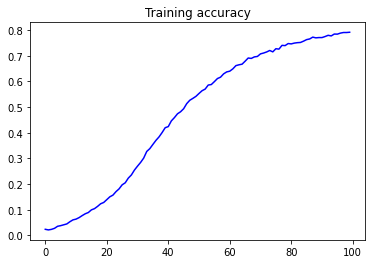

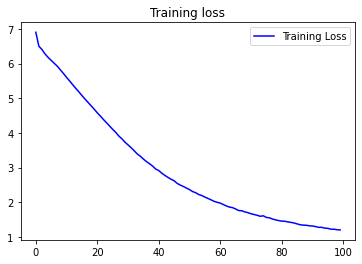

In [ ]:

import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

Create a Shakespearean poem using some seed text. 

In [ ]:
seed_text = "Roelof thinks about food"
next_words = 50
  
for _ in range(next_words):
  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
  predict_x = model.predict(token_list, verbose=0)
  classes_x=np.argmax(predict_x,axis=1)
  output_word = ""
  for word, index in tokenizer.word_index.items():
    if index == classes_x:
      output_word = word
      break
  seed_text += " " + output_word
print(seed_text)

Roelof thinks about food to brave thy service to despise drink up love's scope survey brow pluck me twain woe held report race open sound that power by short or wrinkles love's gentle memory part open sea me joy hence told on them of thee be alone slide write me was my good thing
